In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # For creating plots
# Using Keras for deep learning with TensorFlow as backend 
from keras.models import Sequential, Input  
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from hyperas.distributions import choice, uniform #hyperas for tunning Deep learning
import os

Using TensorFlow backend.


In [2]:
#Raw data from Kaggle in csv format
os.chdir('C:\\Users\\s114sing\\OneDrive - Nokia\\Training Material\\Hackathon\\telecom-customer')
data = pd.read_csv('Telecom_customer churn.csv')

In [3]:
#Raw data attributes 
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [4]:
# Describing data from Raw csv file
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [5]:
#Data Manipulation
col = list (data.describe(include = [np.number])) # extracting Numeric column

#replacing null value with mean for numeric attributes
for i in col:
    #iterating to all coloumns
   data.loc[pd.isnull(data[i]),i] = np.mean(data[i])

data.describe(include = [np.number])

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.208972,524.229868,23.581283,2.173729,97.122320,30.446392,30.002391,3.120946,14.685090,274.854774,...,0.898391,0.387964,0.272854,3.956420,1.274685,1.884277,0.445057,0.231663,256.480910,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.311875,151.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.000000,...,1.000000,0.000000,0.000000,3.000000,2.000000,5.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.377500,357.500000,44.990000,0.247500,3.000000,1.050000,0.700000,0.000000,0.000000,-7.000000,...,1.000000,0.000000,0.000000,6.177238,2.530326,5.783112,1.567563,0.000000,342.000000,1.050000e+06
75%,70.630000,701.250000,59.990000,0.888828,42.000000,14.350000,13.950000,0.000000,0.257500,61.750000,...,2.000000,0.000000,0.000000,7.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [6]:
#non-Numeric attributes
cat_data = data.select_dtypes(include=['object']).copy() 
#Replcing null values
for col in cat_data.columns:
    data[col] = data[col].fillna(data[col].value_counts().index[0])
print(data.isnull().sum())

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
kid11_15       0
kid16_17       0
creditcd       0
eqpdays        0
Customer_ID    0
Length: 100, dtype: int64


In [7]:
#replacing non-numeric values with numeric values 
for col in cat_data.columns:
    labels = data[col].astype('category').cat.categories.tolist()
    replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    data.replace(replace_map_comp, inplace=True)

In [8]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,10,1,1,1,1,1,2,361.0,1000001.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,17,1,1,1,1,1,2,240.0,1000002.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,10,1,2,1,1,1,2,1504.0,1000003.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,15,2,1,1,1,1,2,1812.0,1000004.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,7,1,1,1,1,1,2,434.0,1000005.0


In [9]:
print(data.isnull().sum())

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
kid11_15       0
kid16_17       0
creditcd       0
eqpdays        0
Customer_ID    0
Length: 100, dtype: int64


In [10]:
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,0.057974,10.110500,1.040120,1.046960,1.080730,1.08814,1.099640,1.689660,391.932309,1.050000e+06
std,46.208972,524.229868,23.581283,2.173729,97.122320,30.446392,30.002391,3.120946,14.685090,274.854774,...,0.231663,3.700514,0.196242,0.211554,0.272421,0.28350,0.299521,0.462635,256.480910,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,-5.000000,1.000001e+06
25%,33.311875,151.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.000000,...,0.000000,7.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,212.000000,1.025001e+06
50%,48.377500,357.500000,44.990000,0.247500,3.000000,1.050000,0.700000,0.000000,0.000000,-7.000000,...,0.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,342.000000,1.050000e+06
75%,70.630000,701.250000,59.990000,0.888828,42.000000,14.350000,13.950000,0.000000,0.257500,61.750000,...,0.000000,14.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,1.000000,17.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1823.000000,1.100000e+06


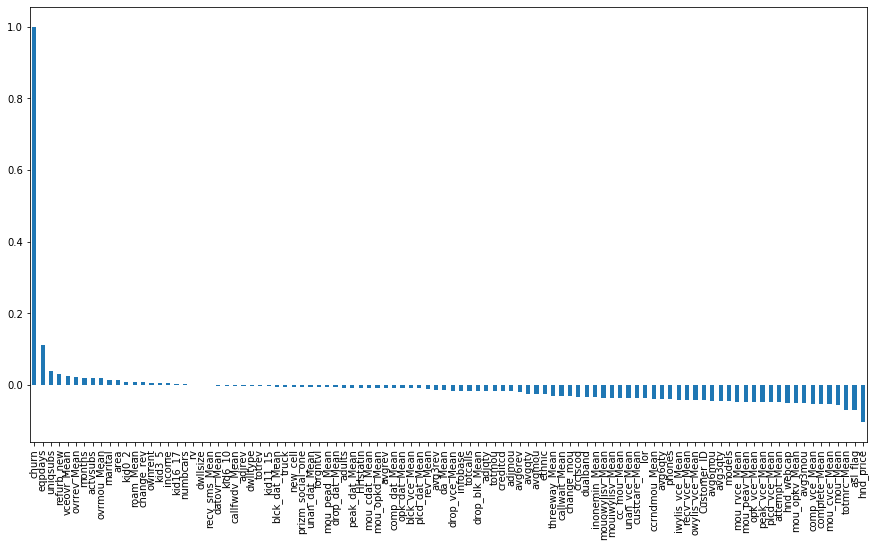

In [11]:
#Data Exploration on manipulated csv data

#Correlation of attributes with respect to attribute "Churn"
#Positive/upwards values shows "churn" is directly  e.g. epqdays(Number of days (age) of current equipment)
#Negative/downwards values shows attributes are inversly co-related with "Churn" e.g. hnd_price(Current handset price)
plt.figure(figsize=(15,8))
data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [12]:
#Checking correlation percentage  with output variable

cor = data.corr()
cor_target = abs(cor["churn"]) # reutrns attributes cor

#Selecting highly correlated features with prediction output & droping non corelated data
relevant_features = cor_target[cor_target>0.05]
relevant_features_length = len(relevant_features)
print(relevant_features)
print(relevant_features_length)

mou_Mean         0.056925
totmrc_Mean      0.068434
comp_vce_Mean    0.051574
mou_cvce_Mean    0.052042
complete_Mean    0.051740
churn            1.000000
asl_flag         0.069473
hnd_price        0.102748
eqpdays          0.112691
Name: churn, dtype: float64
9


In [13]:
data['churn'] = abs(data['churn'])

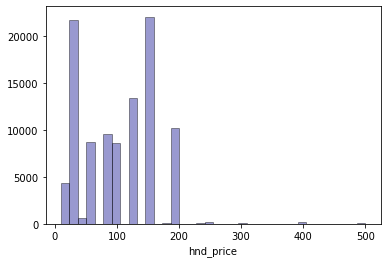

In [14]:
#Explore high co-related attributes hnd_proce (Current handset price)
sns.distplot(data['hnd_price'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

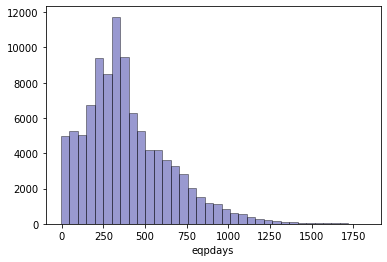

In [15]:
#eqpdays -> Number of days (age) of current equipment 

sns.distplot(data['eqpdays'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

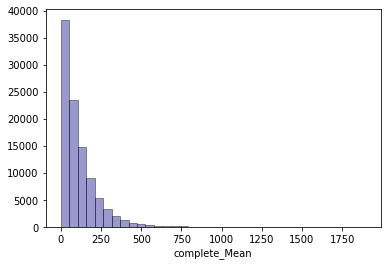

In [16]:
#Explore high co-related attributes complete_Mean (Mean number of completed calls)
sns.distplot(data['complete_Mean'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

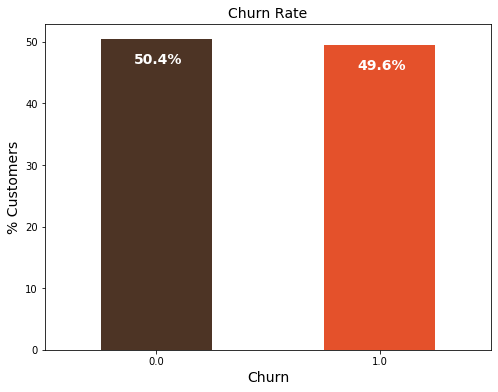

In [17]:
#Churn records in datset with value "1" or "0"
colors = ['#4D3425','#E4512B']
ax = (data['churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

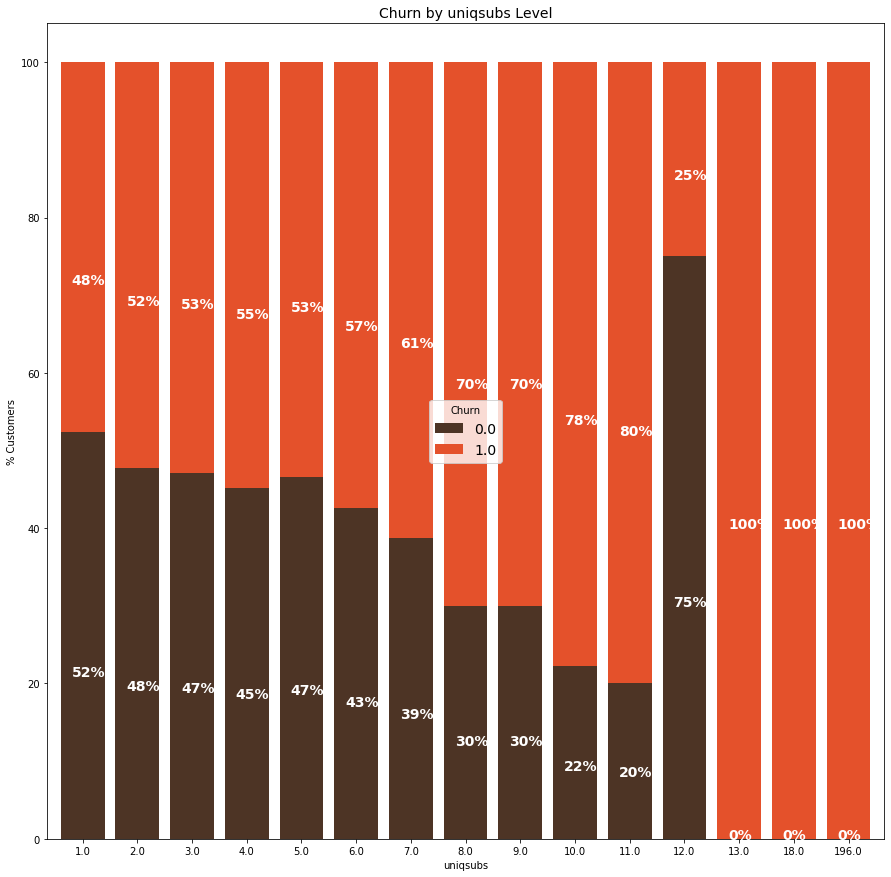

In [18]:
#Analysing churn co-relation with uniqsubs

colors = ['#4D3425','#E4512B']
uniqsubs_churn = data.groupby(['uniqsubs','churn']).size().unstack()

ax = (uniqsubs_churn.T*100.0 / uniqsubs_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,15),
                                                                color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by uniqsubs Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

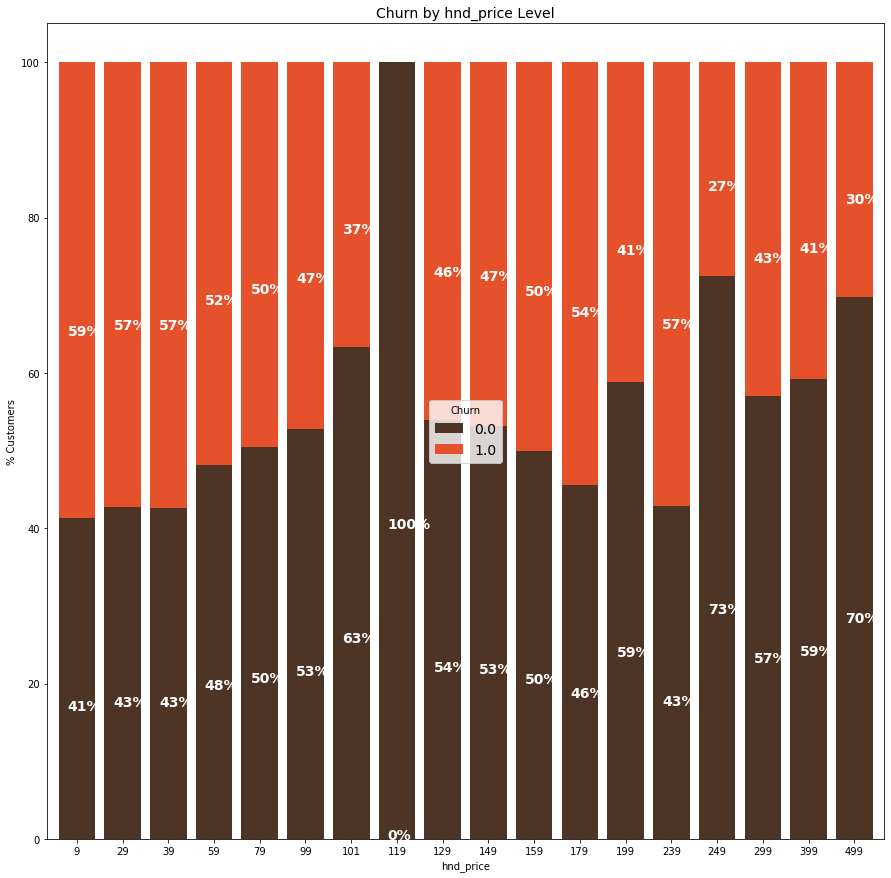

In [19]:
colors = ['#4D3425','#E4512B']
#hnd_price_int = in

data['hnd_price'] = data['hnd_price'].astype('int')

hnd_price_churn = data.groupby(['hnd_price','churn']).size().unstack()

ax = (hnd_price_churn.T*100.0 / hnd_price_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,15),
                                                                color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by hnd_price Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [20]:
#Selecting high co-related attributes with 'churn'
cor_data = data[['mou_Mean','totmrc_Mean','comp_vce_Mean','mou_cvce_Mean','complete_Mean','asl_flag','hnd_price','eqpdays']].to_numpy()

In [21]:
#Create Train and Test datset 
Y = data['churn'].values #churn values to be predicted  
X = cor_data # dataset with higest co-related attributes
#X = data.drop(columns= ['churn'])
#X = X.drop(columns= ['Customer_ID'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
np.shape(X_train)

(80000, 8)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________
None


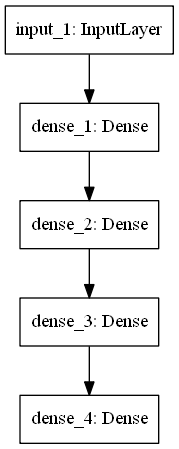

In [22]:
# Using Keras funcitonal API with 3 hidden layer
visible = Input(shape=(8,))
hidden1 = Dense(15, activation='relu')(visible) #hidden layer with 15 neurons with activation function as 'relu'
hidden2 = Dense(10, activation='relu')(hidden1)#hidden layer with 15 neurons with activation function as 'relu'
hidden3 = Dense(10, activation='relu')(hidden2)#hidden layer with 15 neurons with activation function as 'relu'
output = Dense(1, activation='sigmoid')(hidden3)#output layer with 1 neuron with activiation function as 'sigmoid'
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [23]:
#defining optimizer , loss & metrics
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          epochs=800,batch_size=1000)

Epoch 1/800
80000/80000 [==============================] - ETA: 1:00 - loss: 103.4845 - accuracy: 0.51 - ETA: 6s - loss: 86.5218 - accuracy: 0.4999   - ETA: 2s - loss: 65.6944 - accuracy: 0.505 - ETA: 1s - loss: 51.6939 - accuracy: 0.513 - ETA: 0s - loss: 41.8136 - accuracy: 0.515 - ETA: 0s - loss: 34.5575 - accuracy: 0.514 - ETA: 0s - loss: 29.8073 - accuracy: 0.513 - ETA: 0s - loss: 25.8375 - accuracy: 0.511 - 1s 14us/step - loss: 23.8087 - accuracy: 0.5107
Epoch 2/800
80000/80000 [==============================] - ETA: 1s - loss: 2.2958 - accuracy: 0.48 - ETA: 0s - loss: 2.2129 - accuracy: 0.50 - ETA: 0s - loss: 2.0267 - accuracy: 0.51 - ETA: 0s - loss: 1.9994 - accuracy: 0.50 - ETA: 0s - loss: 1.9073 - accuracy: 0.50 - ETA: 0s - loss: 1.8421 - accuracy: 0.50 - ETA: 0s - loss: 1.8004 - accuracy: 0.51 - ETA: 0s - loss: 1.7526 - accuracy: 0.51 - 0s 5us/step - loss: 1.7198 - accuracy: 0.5097
Epoch 3/800
80000/80000 [==============================] - ETA: 0s - loss: 1.3502 - accuracy: 0

Epoch 22/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6825 - accuracy: 0.56 - ETA: 0s - loss: 0.6833 - accuracy: 0.56 - ETA: 0s - loss: 0.6827 - accuracy: 0.56 - ETA: 0s - loss: 0.6828 - accuracy: 0.56 - ETA: 0s - loss: 0.6826 - accuracy: 0.56 - ETA: 0s - loss: 0.6835 - accuracy: 0.56 - 0s 4us/step - loss: 0.6834 - accuracy: 0.5606
Epoch 23/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.54 - ETA: 0s - loss: 0.6814 - accuracy: 0.56 - ETA: 0s - loss: 0.6817 - accuracy: 0.56 - ETA: 0s - loss: 0.6821 - accuracy: 0.56 - ETA: 0s - loss: 0.6825 - accuracy: 0.56 - ETA: 0s - loss: 0.6828 - accuracy: 0.56 - 0s 4us/step - loss: 0.6826 - accuracy: 0.5619
Epoch 24/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6811 - accuracy: 0.56 - ETA: 0s - loss: 0.6817 - accuracy: 0.56 - ETA: 0s - loss

80000/80000 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.58 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - 0s 4us/step - loss: 0.6779 - accuracy: 0.5689
Epoch 65/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.58 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - 0s 4us/step - loss: 0.6783 - accuracy: 0.5690
Epoch 66/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - ac

80000/80000 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.58 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - 0s 4us/step - loss: 0.6772 - accuracy: 0.5700
Epoch 108/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6677 - accuracy: 0.58 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6777 - accuracy: 0.56 - 0s 4us/step - loss: 0.6772 - accuracy: 0.5698
Epoch 109/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.58 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6772 - 

Epoch 151/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - 0s 4us/step - loss: 0.6767 - accuracy: 0.5720
Epoch 152/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.58 - ETA: 0s - loss: 0.6782 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - 0s 4us/step - loss: 0.6768 - accuracy: 0.5723
Epoch 153/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - l

80000/80000 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.56 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - 0s 5us/step - loss: 0.6763 - accuracy: 0.5728
Epoch 195/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.59 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - 0s 4us/step - loss: 0.6761 - accuracy: 0.5729
Epoch 196/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6724 - accuracy: 0.59 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - 

Epoch 233/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.58 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - 0s 5us/step - loss: 0.6758 - accuracy: 0.5737
Epoch 234/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - 0s 5us/step - loss: 0.6760 - accuracy: 0.5722
Epoch 235/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - l

80000/80000 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.58 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6765 - accuracy: 0.56 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - 0s 4us/step - loss: 0.6755 - accuracy: 0.5738
Epoch 276/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6663 - accuracy: 0.59 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - 0s 4us/step - loss: 0.6758 - accuracy: 0.5734
Epoch 277/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6701 - accuracy: 0.56 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 0s 4us/step - loss: 0.6754 - accuracy: 0.5741
Epoch 314/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 0s 4us/step - loss: 0.6754 - accuracy: 0.5741
Epoch 315/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.54 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - 0s 5us/step - loss: 0.6755 - accuracy: 0.5748
Epoch 354/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.53 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6765 - accuracy: 0.56 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - 0s 5us/step - loss: 0.6758 - accuracy: 0.5733
Epoch 355/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - ETA: 0s - loss: 0.6738 - 

Epoch 373/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.56 - ETA: 0s - loss: 0.6731 - accuracy: 0.58 - ETA: 0s - loss: 0.6724 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 1s 7us/step - loss: 0.6755 - accuracy: 0.5738
Epoch 374/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6710 - accuracy: 0.58 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 0s 6us/step - loss: 0.6754 - accur

80000/80000 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.56 - ETA: 1s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.58 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 0s 5us/step - loss: 0.6754 - accuracy: 0.5759
Epoch 413/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.56 - ETA: 0s - loss: 0.6738 - accuracy: 0.58 - ETA: 0s - loss: 0.6741 - accuracy: 0.58 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - 0s 4us/step - loss: 0.6754 - accuracy: 0.5746
Epoch 414/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - 1s 6us/step - loss: 0.6753 - accuracy: 0.5749
Epoch 451/800
80000/80000 [==============================] - ETA: 1s - loss: 0.6770 - accuracy: 0.55 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - 0s 5us/step - loss: 0.6760 - accuracy: 0.5759
Epoch 452/800
80000/80000 [=================

80000/80000 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.59 - ETA: 1s - loss: 0.6716 - accuracy: 0.58 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 1s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - 1s 7us/step - loss: 0.6756 - accuracy: 0.5753
Epoch 491/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 0s 5us/step - loss: 0.6752 - accuracy: 0.5756
Epoch 492/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6790 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.55 - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - 0s 5us/step - loss: 0.6749 - accuracy: 0.5754
Epoch 528/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.53 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 0s 6us/step - loss: 0.6749 - accuracy: 0.5754
Epoch 529/800
80000/80000 [==============================] - ETA: 1s - loss: 0.6708 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - 1s 7us/step - loss: 0.6747 - accuracy: 0.5754
Epoch 561/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.55 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 0s 6us

Epoch 577/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - 0s 5us/step - loss: 0.6751 - accuracy: 0.5755
Epoch 578/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.59 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 0s 4us/step - loss: 0.6748 - accuracy: 0.5769
Epoch 579/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.55 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - l

80000/80000 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.56 - ETA: 0s - loss: 0.6762 - accuracy: 0.56 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 1s 7us/step - loss: 0.6749 - accuracy: 0.5765
Epoch 613/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 0s 4us/step - loss: 0.6747 - accuracy: 0.5771
Epoch 614/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6783 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.59 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - 0s 4us/step - loss: 0.6751 - accuracy: 0.5759
Epoch 652/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.59 - ETA: 0s - loss: 0.6729 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.58 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 1s 6us/step - loss: 0.6748 - accuracy: 0.5760
Epoch 653/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6783 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6673 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - 1s 8us/step - loss: 0.6752 - accuracy: 0.5760
Epoch 686/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.59 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.58 - ETA: 0s - loss: 0.6737 - accuracy: 0.58 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0

Epoch 702/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.56 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 0s 4us/step - loss: 0.6747 - accuracy: 0.5772
Epoch 703/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 0s 4us/step - loss: 0.6750 - accuracy: 0.5764
Epoch 704/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.59 - ETA: 0s - loss: 0.6713 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - l

80000/80000 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 0s 4us/step - loss: 0.6745 - accuracy: 0.5765
Epoch 740/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.56 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 0s 4us/step - loss: 0.6745 - accuracy: 0.5764
Epoch 741/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.59 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.58 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 0s 5us/step - loss: 0.6744 - accuracy: 0.5772
Epoch 779/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6647 - accuracy: 0.59 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.58 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 0s 5us/step - loss: 0.6746 - accuracy: 0.5759
Epoch 780/800
80000/80000 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6730 - 

In [24]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

20000/20000 [==============================] - ETA: 1: - ETA: 2s - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 27us/step
Accuracy: 57.92
